In [40]:
import numpy as np
import os,glob,struct
import xarray as xr
import pandas as pd

In [49]:
root_dir = "/home/hectorb/PARFLOW/PROJECTS/Hillslope/ASAO_sensitivity/"

In [50]:
def PFB_read(pfb_file_path, flag):

    #print("**This code DOES handle subgrids**")
    # flag = 1: return array + header
    # flag = 0: return array only
    
    hdr_dict = {}
    
    with open(pfb_file_path,'rb') as pfbf:
        hdr_dict['X0'] = struct.unpack('>d', pfbf.read(8))[0]
        hdr_dict['Y0'] = struct.unpack('>d', pfbf.read(8))[0]
        hdr_dict['Z0'] = struct.unpack('>d', pfbf.read(8))[0]
        hdr_dict['nx'] = struct.unpack('>i', pfbf.read(4))[0]
        hdr_dict['ny'] = struct.unpack('>i', pfbf.read(4))[0]
        hdr_dict['nz'] = struct.unpack('>i', pfbf.read(4))[0]
        hdr_dict['dx'] = struct.unpack('>d', pfbf.read(8))[0]
        hdr_dict['dy'] = struct.unpack('>d', pfbf.read(8))[0]
        hdr_dict['dz'] = struct.unpack('>d', pfbf.read(8))[0]
        hdr_dict['ns'] = struct.unpack('>i', pfbf.read(4))[0]
        ns = hdr_dict['ns']
        #print(ns)
        nx = hdr_dict['nx']
        ny = hdr_dict['ny']
        nz = hdr_dict['nz']
        
        if nx == 0:
            nx = int(raw_input("What should the NX be?"))
            hdr_dict['nx'] = nx
        if ny == 0:
            ny = int(raw_input("What should the NY be?"))
            hdr_dict['ny'] = ny
        if nz ==0:
            nz =int(raw_input("What should the NZ be?"))
            hdr_dict['nz'] = nz
        
        X0 = hdr_dict['X0']
        #print "len_x, len_y, len_z, nx ny nz --> %f %f %f %i %i %i" %(len_x, len_x, len_x, nx, ny, nz)
        
        pfb_array = np.zeros((nx, ny, nz))
        
        for subgrids in range(ns):
            hdr_dict['ix'] = struct.unpack('>i', pfbf.read(4))[0]
            ix = hdr_dict['ix']
            hdr_dict['iy'] = struct.unpack('>i', pfbf.read(4))[0]
            iy = hdr_dict['iy']
            #print(iy)
            hdr_dict['iz'] = struct.unpack('>i', pfbf.read(4))[0]
            iz = hdr_dict['iz']
            hdr_dict['nx2'] = struct.unpack('>i', pfbf.read(4))[0]
            nx2 = hdr_dict['nx2']
            hdr_dict['ny2'] = struct.unpack('>i', pfbf.read(4))[0]
            ny2 = hdr_dict['ny2']
            #print(ny2)
            hdr_dict['nz2'] = struct.unpack('>i', pfbf.read(4))[0]
            nz2 = hdr_dict['nz2']
            hdr_dict['rx'] = struct.unpack('>i', pfbf.read(4))[0]
            rx = hdr_dict['rx']
            hdr_dict['ry'] = struct.unpack('>i', pfbf.read(4))[0]
            ry = hdr_dict['ry']
            hdr_dict['rz'] = struct.unpack('>i', pfbf.read(4))[0]
            rz = hdr_dict['rz']
            #print "ix iy iz nx2 ny2 nz2 rx ry rz --> %i %i %i %i %i %i %i %i %i\n" %(ix,iy, iz, nx2, ny2, nz2, rx,ry, rz)
            for lays in range(nz2):
                for rows in range(ny2):
                    for cols in range(nx2):
                        val = struct.unpack('>d', pfbf.read(8))[0]
                        #q = raw_input(val)
                        pfb_array[(cols+ix), (rows + iy), (nz2-(lays + iz)-1)] = val
                        #pfb_array[(cols+ix-1), (nx2-(iy)-1), (nz2-(lays + iz)-1)] = val
                        #pfb_array[(rows + iy-1), (cols+ix-1), (nz2-(lays + iz)-1)] = val
                        #print val
                        
    if flag ==1:
        return(pfb_array, hdr_dict)
    else:
        return(pfb_array)


In [167]:
datadir = root_dir+'results_17/'
dz_mult_arr,h = PFB_read(glob.glob(os.path.join(datadir,'*dz_mult.pfb'))[0],1)
vdz = dz_mult_arr[0,0,:]
z = np.cumsum(vdz)-vdz/2
print(vdz)
print(z)
print(np.cumsum(vdz))

[1.0e-02 4.0e-02 1.5e-01 3.0e-01 5.0e-01 1.5e+00 2.5e+00 1.0e+01 4.5e+01]
[5.00e-03 3.00e-02 1.25e-01 3.50e-01 7.50e-01 1.75e+00 3.75e+00 1.00e+01
 3.75e+01]
[1.0e-02 5.0e-02 2.0e-01 5.0e-01 1.0e+00 2.5e+00 5.0e+00 1.5e+01 6.0e+01]


In [168]:
"""identify files"""
files = glob.glob(os.path.join(datadir,'*press.*.pfb'))
files.sort()
#skip initial condition
files.pop(0)

'/home/hectorb/PARFLOW/PROJECTS/Hillslope/ASAO_sensitivity/results_17/h17.out.press.00000.pfb'

In [169]:
"""reads in the first file to have the dimension & initialize"""
d,h=PFB_read(files[0],1)
print(h)

{'X0': 0.0, 'Y0': 0.0, 'Z0': 0.0, 'nx': 1, 'ny': 5, 'nz': 9, 'dx': 1000.0, 'dy': 1000.0, 'dz': 1.0, 'ns': 1, 'ix': 0, 'iy': 0, 'iz': 0, 'nx2': 1, 'ny2': 5, 'nz2': 9, 'rx': 0, 'ry': 0, 'rz': 0}


In [170]:
pressure_array = np.zeros([h['ny'],h['nz'],len(files)])
"""reads in all files"""
for t,f in enumerate(files):
    d,h=PFB_read(f,1)
    pressure_array[:,:,t] = d[0,:,:]

In [173]:
"""write netcdf"""
#ds = xr.Dataset({"press": (("time","z",'y'), np.swapaxes(pressure_array,2,0))},
#    coords={"y":np.arange(start = h['Y0'],stop = h['Y0']+h['ny']*h['dy'],step=h['dy']),
#        "z":-z, 
#        "time": pd.date_range("2000-01-01", periods=len(files),freq='30D'),
#        "reference_time": pd.Timestamp("2000-01-01")})

# for yearly
ds = xr.Dataset({"press": (("time","z",'y'), np.swapaxes(pressure_array,2,0))},
    coords={"y":np.arange(start = h['Y0'],stop = h['Y0']+h['ny']*h['dy'],step=h['dy']),
        "z":-z, 
        "time": 1+np.arange(0,len(files)),
        "reference_time": pd.Timestamp("2000-01-01")})


ds.press.attrs['units']='m'
ds.z.attrs['units']='meters'
ds.y.attrs['units']='meters'

ds.to_netcdf(os.path.join(datadir,"press.nc"),format="NETCDF4")

In [174]:
ds = xr.open_dataset(os.path.join(datadir,"press.nc"))
ds = ds.assign(WTD = z[-1] - ds.press.isel(z=-1))

In [175]:
len(files)

1216

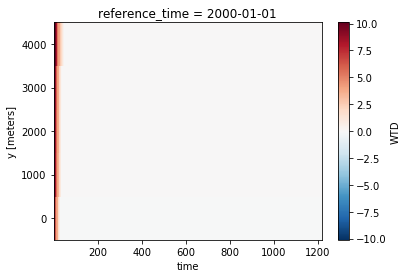

In [176]:
ds.WTD.plot(x='time')

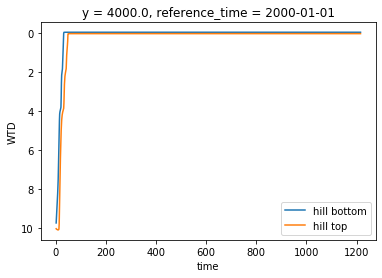

In [177]:
from matplotlib import pyplot as plt
ds.WTD.isel(y=0).plot(label='hill bottom')
ds.WTD.isel(y=4).plot(label='hill top')
plt.gca().legend()
plt.gca().invert_yaxis()


In [135]:
ds.close()